# Stock Market Prediction Using Hierarchical Clustering, Graph Analysis, and Community Detection

 Import Libraries

In [38]:
import yfinance as yf
import pandas as pd
import networkx as nx
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from community import community_louvain
import matplotlib.pyplot as plt


Download Historical Stock Data

In [39]:
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'BRK-B', 'JNJ', 'V', 'WMT',
          'NVDA', 'JPM', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'PYPL', 'ADBE', 'NFLX',
          'PEP', 'INTC', 'KO', 'NKE', 'MRK', 'PFE', 'T', 'VZ', 'XOM', 'CSCO']
data = yf.download(stocks, start="2022-01-01", end="2023-01-01")['Adj Close']


[*********************100%%**********************]  30 of 30 completed


Calculate and Normalize Daily Returns

In [40]:
returns = data.pct_change().dropna()
scaler = StandardScaler()
normalized_returns = pd.DataFrame(scaler.fit_transform(returns), columns=returns.columns, index=returns.index)

Calculate the Pearson correlation matrix

In [41]:
correlation_matrix = normalized_returns.corr()

Create a graph

In [42]:
G = nx.Graph()
G.add_nodes_from(stocks)
threshold = 0.5
for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > threshold:
            G.add_edge(stocks[i], stocks[j], weight=corr)

Louvain method for community detection

In [43]:
partition = community_louvain.best_partition(G)
print("Community detection using Louvain method:")
print(partition)

Community detection using Louvain method:
{'AAPL': 0, 'MSFT': 0, 'GOOGL': 0, 'AMZN': 1, 'META': 1, 'TSLA': 0, 'BRK-B': 0, 'JNJ': 1, 'V': 1, 'WMT': 3, 'NVDA': 1, 'JPM': 3, 'UNH': 1, 'HD': 0, 'PG': 3, 'MA': 0, 'DIS': 0, 'PYPL': 1, 'ADBE': 0, 'NFLX': 3, 'PEP': 3, 'INTC': 3, 'KO': 0, 'NKE': 4, 'MRK': 0, 'PFE': 3, 'T': 1, 'VZ': 4, 'XOM': 5, 'CSCO': 2}


Constructing and Plotting Minimum Spanning Tree (MST)

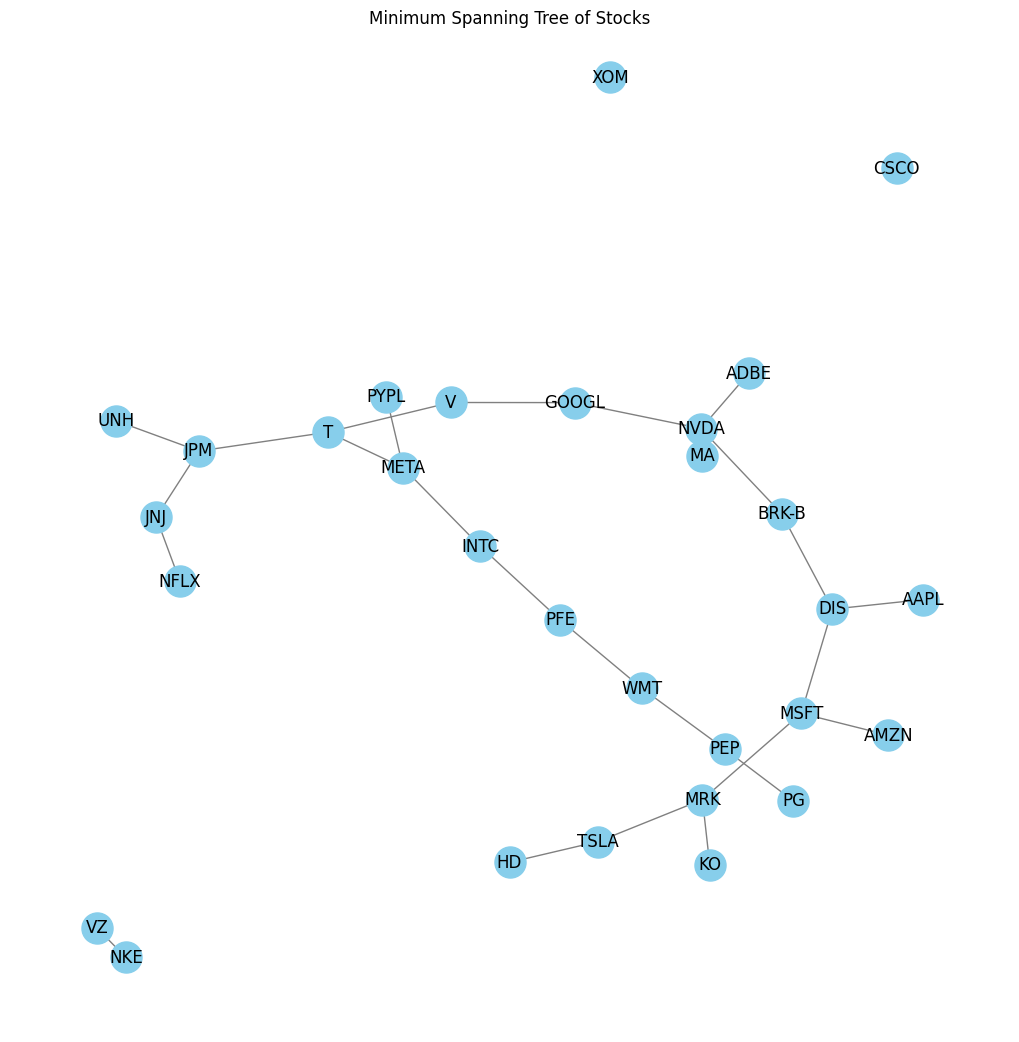

In [44]:
# Construct Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

# Plot MST
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(mst)
nx.draw(mst, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
plt.title("Minimum Spanning Tree of Stocks")
plt.show()


Dynamic clustering: Observe how clusters evolve over time

[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  30 of 30 completed


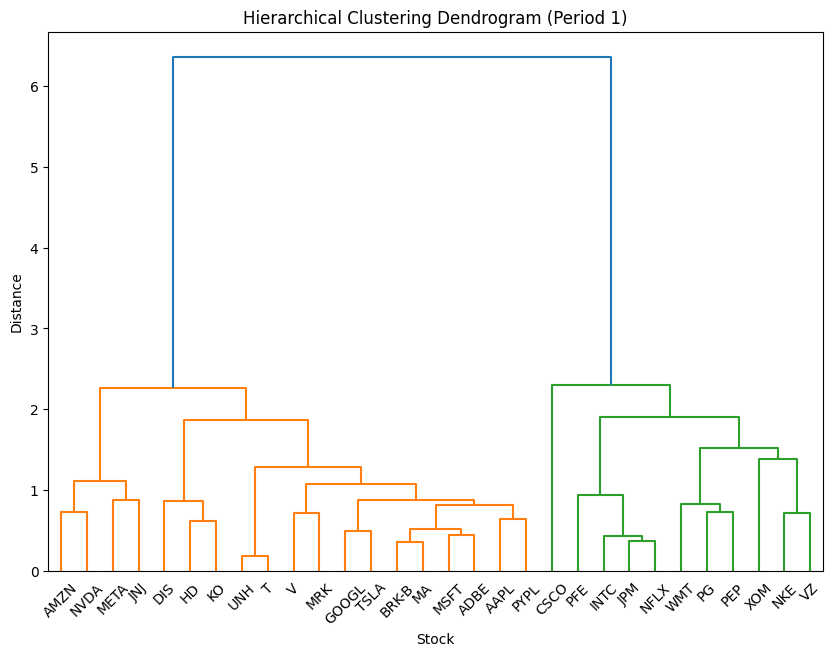

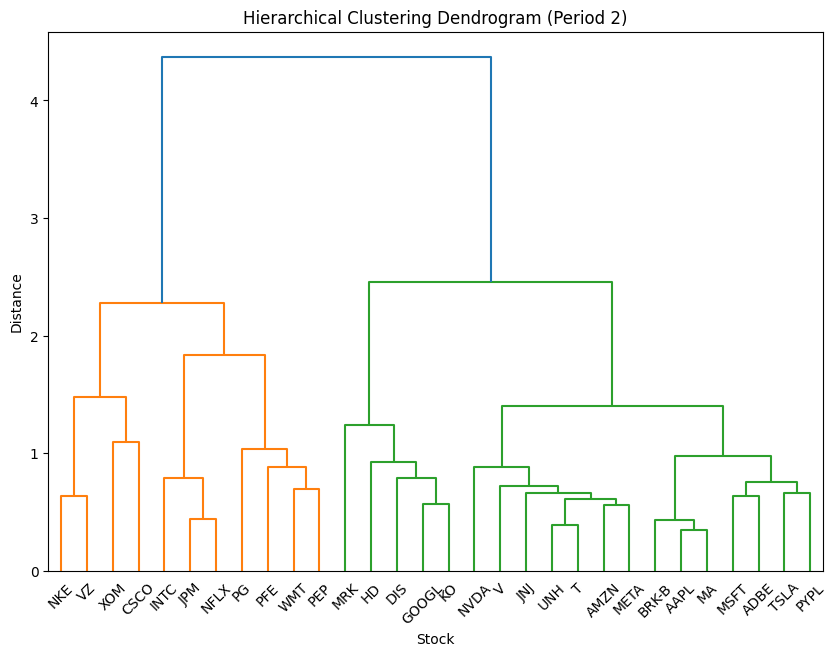

In [46]:
# Split data into two halves for dynamic analysis
split_date = '2022-07-01'
data_1 = yf.download(stocks, start="2022-01-01", end=split_date)['Adj Close']
data_2 = yf.download(stocks, start=split_date, end="2023-01-01")['Adj Close']

# Calculate daily returns for both periods
returns_1 = data_1.pct_change().dropna()
returns_2 = data_2.pct_change().dropna()

# Normalize returns for both periods
normalized_returns_1 = pd.DataFrame(scaler.fit_transform(returns_1), columns=returns_1.columns, index=returns_1.index)
normalized_returns_2 = pd.DataFrame(scaler.fit_transform(returns_2), columns=returns_2.columns, index=returns_2.index)

# Calculate the Pearson correlation matrices for both periods
correlation_matrix_1 = normalized_returns_1.corr()
correlation_matrix_2 = normalized_returns_2.corr()

# Plot dendrograms for both periods
for i, (corr_matrix, period) in enumerate(zip([correlation_matrix_1, correlation_matrix_2], ['Period 1', 'Period 2'])):
    distance_matrix = 1 - corr_matrix.abs()
    condensed_distance_matrix = pdist(distance_matrix)
    linkage_matrix = linkage(condensed_distance_matrix, method='ward')

    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=stocks)
    plt.title(f"Hierarchical Clustering Dendrogram ({period})")
    plt.xlabel("Stock")
    plt.ylabel("Distance")
    plt.show()


Enhanced Backtesting and Cluster Evaluation

[*********************100%%**********************]  1 of 1 completed


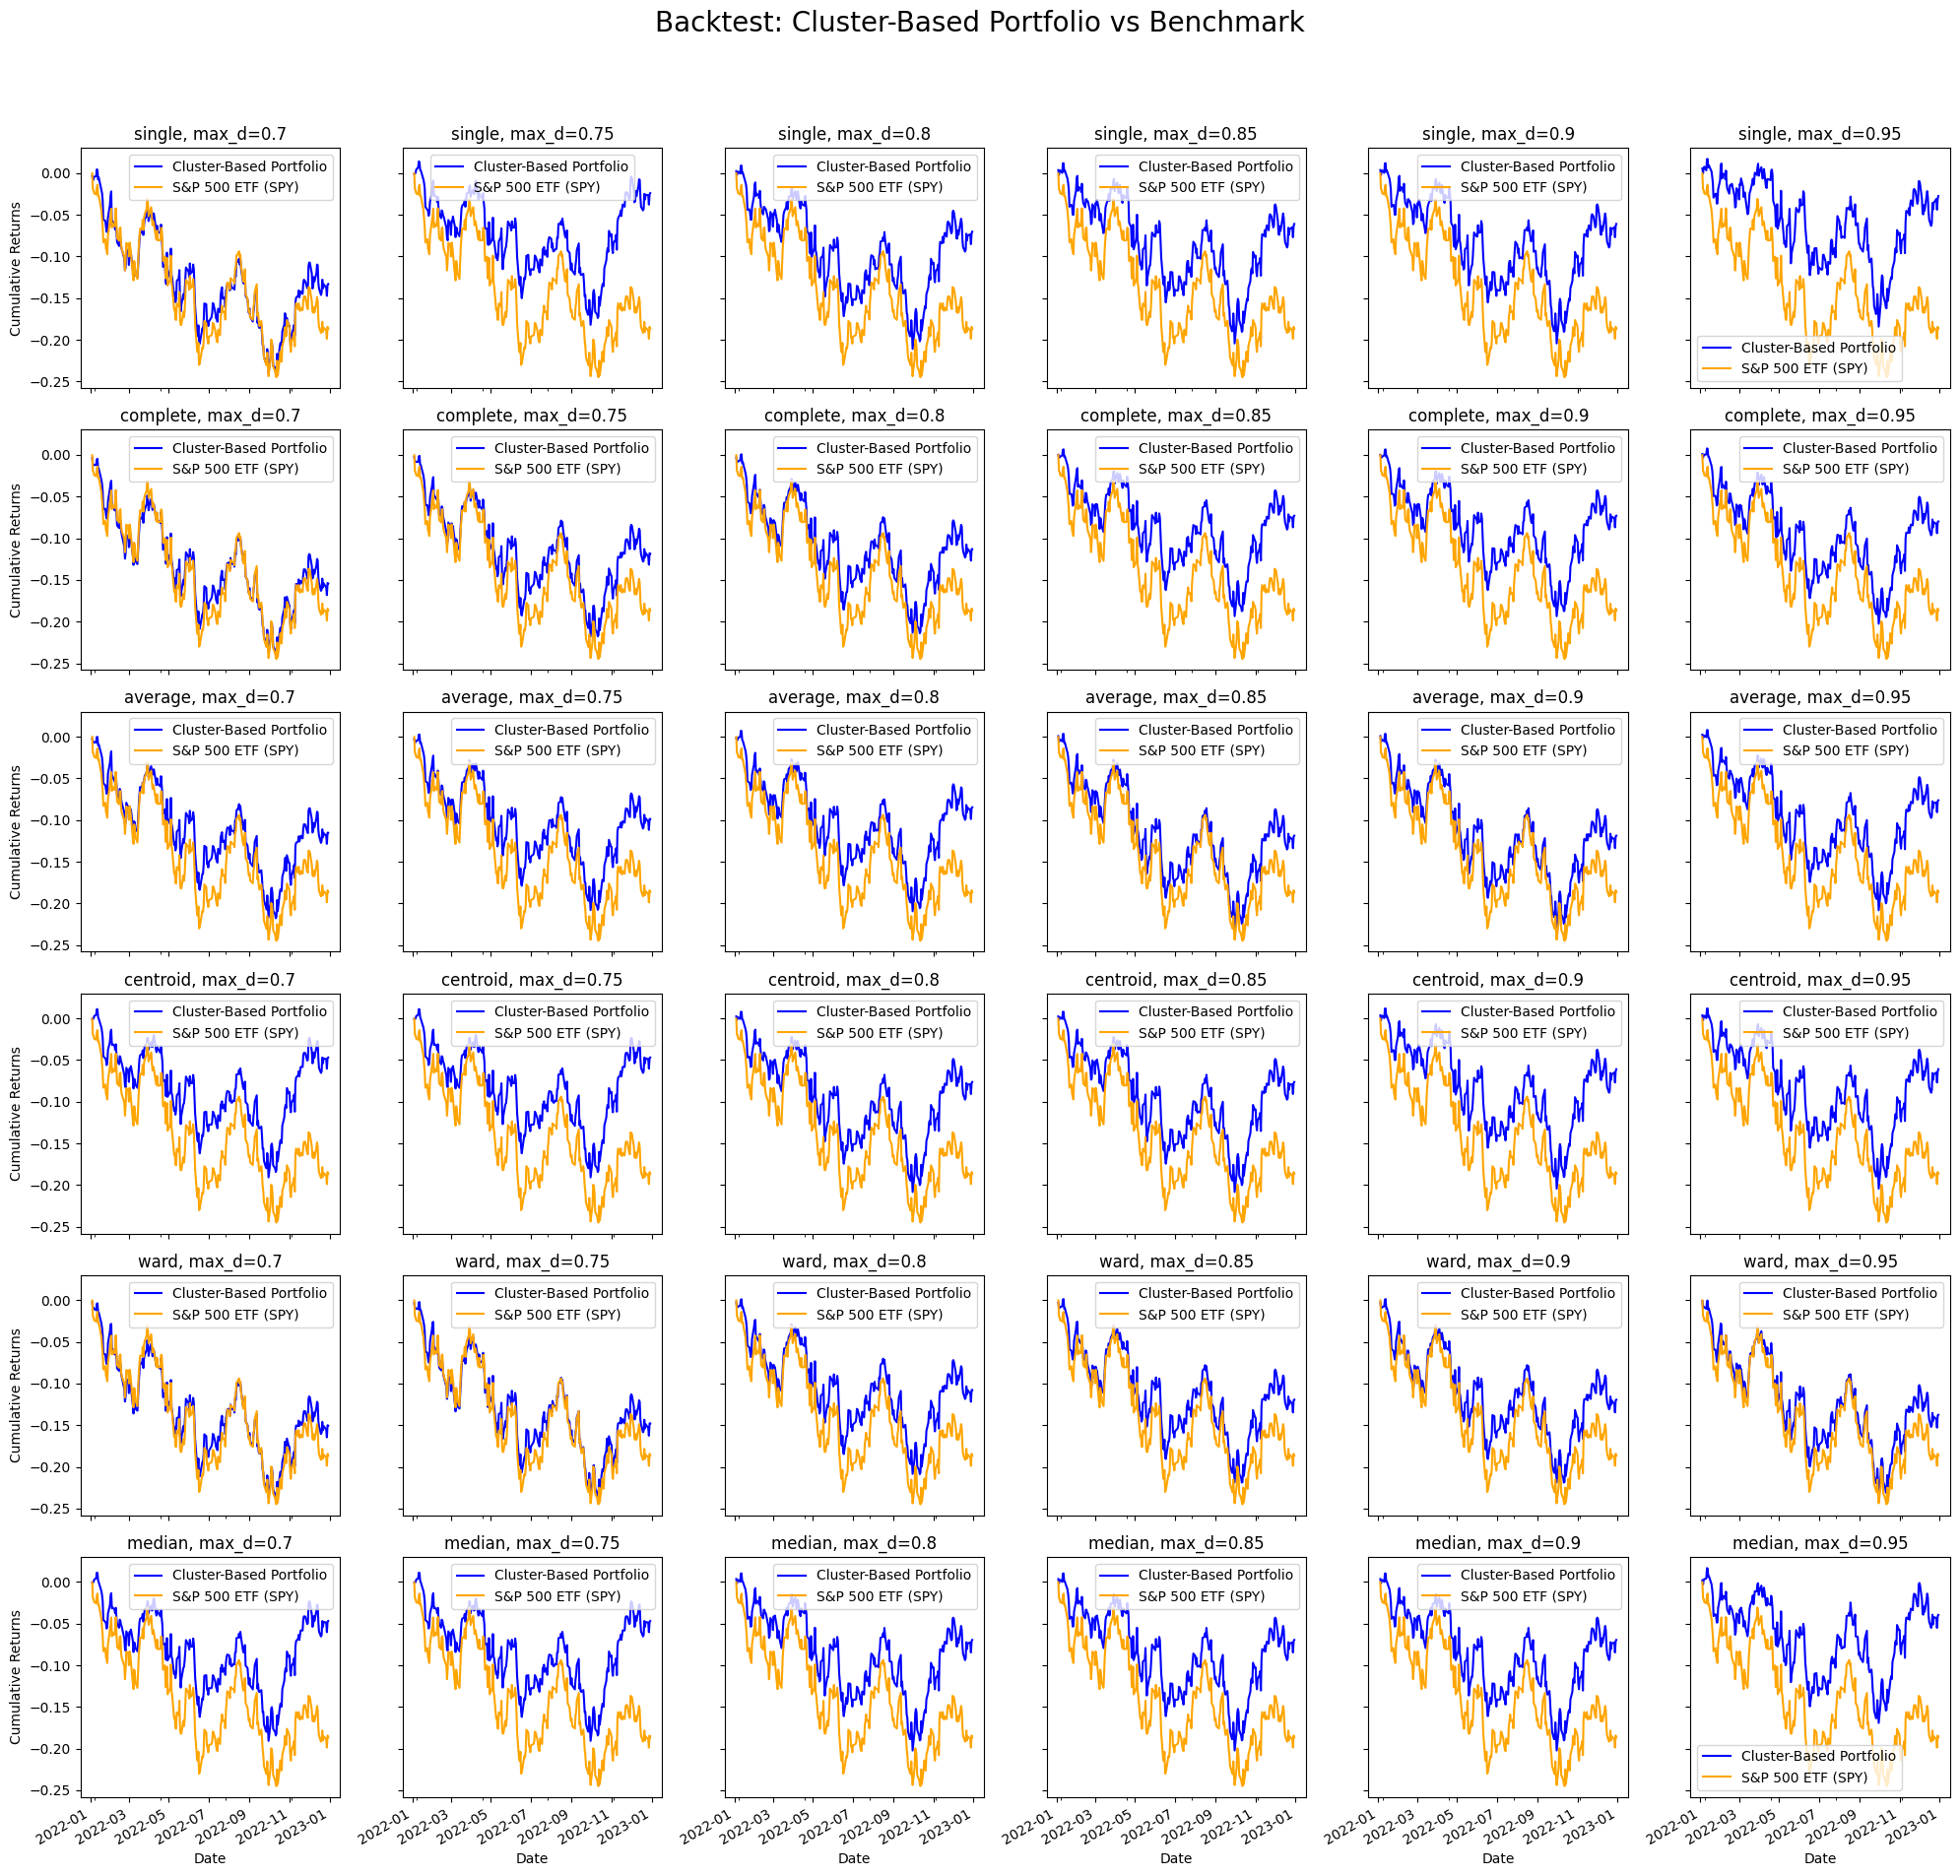

Clustering Evaluation Results:


,Method,Max_d,Silhouette Score,Cophenetic Correlation,Calinski-Harabasz Score,Davies-Bouldin Score
0,single,0.70,0.153758,0.770217,2.699069,0.915776
1,single,0.75,0.163183,0.770217,2.916324,0.944034
2,single,0.80,0.280205,0.770217,3.361030,1.121199
3,single,0.85,0.315577,0.770217,3.539452,1.161184
4,single,0.90,0.315577,0.770217,3.539452,1.161184
5,single,0.95,0.214451,0.770217,2.037306,1.029961
6,complete,0.70,0.159561,0.880787,2.884794,0.946441
7,complete,0.75,0.161453,0.880787,2.851418,1.112973
8,complete,0.80,0.160027,0.880787,2.895390,1.166017
9,complete,0.85,0.173004,0.880787,3.138956,1.309482


In [47]:
# Load S&P 500 ETF data for benchmarking
benchmark_data = yf.download("SPY", start="2022-01-01", end="2023-01-01")['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()

# DataFrame to store clustering results
results = pd.DataFrame(columns=['Method', 'Max_d', 'Silhouette Score', 'Cophenetic Correlation', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

# Clustering evaluation
methods = ['single', 'complete', 'average', 'centroid', 'ward', 'median']
max_d_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

# Prepare subplots
fig, axes = plt.subplots(len(methods), len(max_d_values), figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("Backtest: Cluster-Based Portfolio vs Benchmark", fontsize=20)

for i, method in enumerate(methods):
    for j, max_d in enumerate(max_d_values):
        distance_matrix = 1 - correlation_matrix.abs()
        condensed_distance_matrix = pdist(distance_matrix)
        linkage_matrix = linkage(condensed_distance_matrix, method=method)
        clusters = fcluster(linkage_matrix, max_d, criterion='distance')

        # Calculate metrics
        silhouette_avg = silhouette_score(distance_matrix, clusters, metric='precomputed')
        c, _ = cophenet(linkage_matrix, condensed_distance_matrix)
        ch_score = calinski_harabasz_score(normalized_returns.T, clusters)
        db_score = davies_bouldin_score(normalized_returns.T, clusters)

        # Append to results
        result = pd.DataFrame({
            'Method': [method],
            'Max_d': [max_d],
            'Silhouette Score': [silhouette_avg],
            'Cophenetic Correlation': [c],
            'Calinski-Harabasz Score': [ch_score],
            'Davies-Bouldin Score': [db_score]
        })
        results = pd.concat([results, result], ignore_index=True)

        # Cluster-based portfolio
        cluster_returns = []
        unique_clusters = np.unique(clusters)
        for cluster in unique_clusters:
            cluster_stocks = [stocks[k] for k in range(len(stocks)) if clusters[k] == cluster]
            cluster_data = returns[cluster_stocks].mean(axis=1)
            cluster_returns.append(cluster_data)

        # Combine cluster returns into a portfolio
        combined_returns = pd.concat(cluster_returns, axis=1).mean(axis=1)
        combined_cum_returns = (1 + combined_returns).cumprod() - 1
        benchmark_cum_returns = (1 + benchmark_returns).cumprod() - 1

        # Plot on the respective subplot
        ax = axes[i, j]
        combined_cum_returns.plot(ax=ax, label="Cluster-Based Portfolio", color="blue")
        benchmark_cum_returns.plot(ax=ax, label="S&P 500 ETF (SPY)", color="orange")
        ax.set_title(f"{method}, max_d={max_d}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Cumulative Returns")
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Clustering Evaluation Results:")
results


Calculate Momentum (12-month return)

In [53]:
# Extend the data range to cover the full momentum period
start_date = "2021-01-01"  # Start date should be at least 252 trading days before the analysis period
end_date = "2023-01-01"
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'BRK-B', 'JNJ', 'V', 'WMT',
          'NVDA', 'JPM', 'UNH', 'HD', 'PG', 'MA', 'DIS', 'PYPL', 'ADBE', 'NFLX',
          'PEP', 'INTC', 'KO', 'NKE', 'MRK', 'PFE', 'T', 'VZ', 'XOM', 'CSCO']

data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()
scaler = StandardScaler()
normalized_returns = pd.DataFrame(scaler.fit_transform(returns), columns=returns.columns, index=returns.index)
correlation_matrix = normalized_returns.corr()
benchmark_data = yf.download("SPY", start=start_date, end=end_date)['Adj Close']
benchmark_returns = benchmark_data.pct_change().dropna()

results = pd.DataFrame(columns=['Method', 'Max_d', 'Silhouette Score', 'Cophenetic Correlation', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

# Clustering evaluation
methods = ['single', 'complete', 'average', 'centroid', 'ward', 'median']
max_d_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

print("Clustering Evaluation Results:")
print(results)

# Calculate momentum (12-month return)
momentum = (data / data.shift(252)) - 1
momentum = momentum.dropna()  # Drop rows with NaN values resulting from insufficient data

print("Momentum (12-month return):")
print(momentum.tail(1))  # Display the most recent momentum values



[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  1 of 1 completed


Clustering Evaluation Results:
Empty DataFrame
Columns: [Method, Max_d, Silhouette Score, Cophenetic Correlation, Calinski-Harabasz Score, Davies-Bouldin Score]
Index: []
Momentum (12-month return):
Ticker          AAPL      ADBE      AMZN     BRK-B      CSCO       DIS  \
Date                                                                     
2022-12-30 -0.266644 -0.410145 -0.501911  0.029735 -0.227674 -0.442827   

Ticker         GOOGL        HD      INTC       JNJ  ...       PFE        PG  \
Date                                                ...                       
2022-12-30 -0.396514 -0.210112 -0.468902  0.052123  ... -0.094108 -0.045755   

Ticker          PYPL         T      TSLA       UNH        V        VZ  \
Date                                                                    
2022-12-30 -0.628831  0.056951 -0.654745  0.064508 -0.03919 -0.204655   

Ticker           WMT       XOM  
Date                            
2022-12-30  0.005929  0.886422  

[1 rows x 30 columns

In [54]:
# Identify bear and bull markets
def market_type(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    bear_market = drawdown.min() <= -0.2
    bull_market = (cumulative_returns.iloc[-1] - cumulative_returns.cummax().iloc[-1]) >= 0.2 * cumulative_returns.cummax().iloc[-1]
    if bear_market:
        return "Bear Market"
    elif bull_market:
        return "Bull Market"
    else:
        return "Neutral Market"

benchmark_cum_returns = (1 + benchmark_returns).cumprod() - 1
market_status = market_type(benchmark_cum_returns)
print("Current Market Status:", market_status)


Current Market Status: Bear Market
